C:\Users\Sarvi\AppData\Local\Temp\ipykernel_15796\979219659.py:25: RuntimeWarning: overflow encountered in scalar add
  local_thresh = (local_max + local_min) / 2


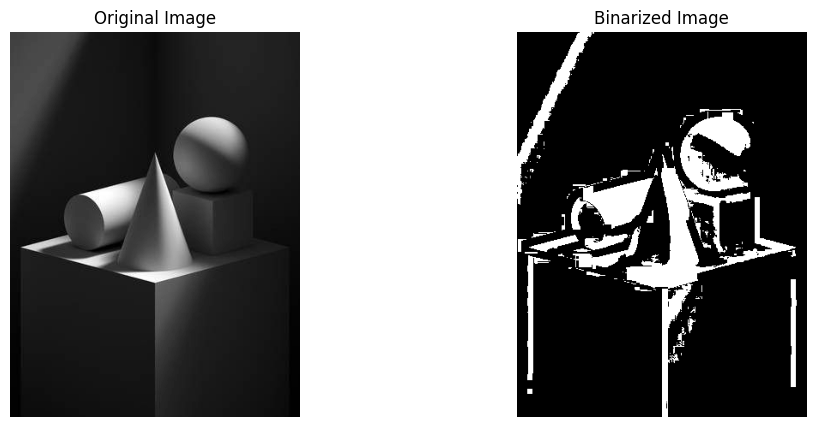

In [3]:
import numpy as np
from skimage import io
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import cv2 as cv

def bernsen_threshold(image, window_size, contrast_threshold):
    # Pad the image to handle the borders
    padded_image = np.pad(image, window_size // 2, mode='reflect')
    thresh_image = np.zeros_like(image)
    
    # Loop over the image applying the Bernsen algorithm
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the local region (window)
            local_region = padded_image[i:i + window_size, j:j + window_size]
            local_max = np.max(local_region)
            local_min = np.min(local_region)
            
            # Calculate local contrast
            local_contrast = local_max - local_min
            
            # Apply Bernsen's logic
            if local_contrast > contrast_threshold:
                local_thresh = (local_max + local_min) / 2
            else:
                # Use Otsu's method to find a global threshold if the contrast is not high enough
                local_thresh = threshold_otsu(image) 
            
            # Apply the calculated local threshold
            thresh_image[i, j] = 255 if image[i, j] > local_thresh else 0
            
    return thresh_image

# Load the image
image = cv.imread('./shadowed_object_1.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('./shadowed_text_2.jpg', cv.IMREAD_GRAYSCALE)


# Apply Bernsen's thresholding
window_size = 15  # For example, a 15x15 window
contrast_threshold = 15  # This is the contrast threshold L
binary_image = bernsen_threshold(image, window_size, contrast_threshold)

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Binarized image
ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binarized Image')
ax[1].axis('off')

plt.show()
